#DSCI 2410 Final Project

##Team members:
* Dalia Hassan - 900235756
* Salma sameeh - 900245865

**Date:** December 11, 2025

#Section 1: Introduction and Research Question

For years, YouTube had been built around longer content such as 10-minute videos, 30-minute vlogs, hour-long streams. But with TikTok’s rise in 2017 and the global launch of YouTube Shorts in 2021, user behavior began shifting toward quick, short-form content. This shift matters because it directly affects how people consume information, how creators design content, and how platforms optimize their algorithms. While research on TikTok and Reels shows that short-form videos drive frequent, fast interactions, much less is known about how Shorts specifically reshape engagement patterns on a platform historically built around longer videos.

Our project addresses this gap by analyzing the YouTube Recommendations Dataset from 2021–2025 to compare engagement between short and long-form videos within the same ecosystem. Rather than relying on platform reports, we use empirical data to examine how often short videos appear, how users interact with them, and whether their rise changes the overall balance of content consumption. This helps clarify whether Shorts are supplementing or overshadowing traditional long-form content. This would benefit researchers, creators, and anyone trying to understand modern digital media trends.




##Research Question:  

How has the rise of short-form videos (<60 seconds) on YouTube between 2021 and 2025 affected video-level engagement metrics and the relative share of short vs. long-form content consumption?


To answer this research question, we look for measurable differences in engagement metrics—such as views, likes, and comment rates—between short and long-form videos over time, as well as changes in how frequently each type appears in recommendations. Evidence of rising engagement with Shorts or a shifting share of short vs. long-form content consumption would indicate how Shorts have reshaped user behavior on YouTube.


##Dataset Description:

* Source: YouTube recommendation dataset (Kaggle)
* Number of observations: 537
* Number of variables: 16
* Timeframe: 2012–2025 (divided three distinct eras: Pre-Shorts, Experimenting, and Global Shorts)
* Key Variables: Video duration, Engagement metrics, View and interaction counts, Publication dates and content categories


## Hypotheses \\ Initial Expectations:
* Short-form videos would get higher engagement rates compared to longer content.
* Long-form content would experience declining engagement, crowded out by the shorts algorithm.
* Engagement patterns would vary by content category, with entertainment and music adapting faster to shorts formats.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Load dataset
df= pd.read_csv('https://raw.githubusercontent.com/Dalia0Hassan/Data2Project/refs/heads/main/youtube_recommendation_dataset.csv')

In [ ]:
# Display first few rows
display(df.head())

,Title,channel_title,published_at,category_id,view_count,like_count,comment_count,favorite_count,duration,definition,caption,engagement_rate,likes_to_views_ratio,comments_to_views_ratio,duration_seconds,video_age_days
0,LA PERVERSA X LA INSUPERABLE X ALOFOKE MUSIC X...,AlofokeMusicSounds,2025-11-16 15:34:55+00:00,10,1405647,140463,9063,0,PT1M51S,hd,False,0.106375,0.099928,0.006448,111,1
1,Moana | Official Teaser,Disney,2025-11-17 17:00:47+00:00,24,2776847,26801,6684,0,PT1M,hd,True,0.012059,0.009652,0.002407,60,0
2,$0 - $1 Trillion Only FISHING in Steal a Brain...,CaylusBlox,2025-11-17 22:57:14+00:00,20,1189857,16174,1827,0,PT18M2S,hd,False,0.015129,0.013593,0.001535,1082,0
3,ALLDAY PROJECT - ‘ONE MORE TIME’ M/V,THEBLACKLABEL,2025-11-17 09:00:07+00:00,10,5319161,0,12869,0,PT3M23S,hd,True,0.002419,0.000000,0.002419,203,1
4,La Lupa | Vendetta Hero Trailer | Overwatch 2,PlayOverwatch,2025-11-17 17:00:06+00:00,20,597542,41742,4728,0,PT3M35S,hd,True,0.077768,0.069856,0.007912,215,0


In [ ]:
# Basic dataset information
print(f"Dataset shape: {df.shape}")
print(f"Number of observations: {len(df)}")
print(f"Number of variables: {df.shape[1]}")

Dataset shape: (537, 16)
Number of observations: 537
Number of variables: 16


#Section 2: Data Preparation and Cleaning

In [ ]:
# Examine data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    537 non-null    object 
 1   channel_title            537 non-null    object 
 2   published_at             537 non-null    object 
 3   category_id              537 non-null    int64  
 4   view_count               537 non-null    int64  
 5   like_count               537 non-null    int64  
 6   comment_count            537 non-null    int64  
 7   favorite_count           537 non-null    int64  
 8   duration                 537 non-null    object 
 9   definition               537 non-null    object 
 10  caption                  537 non-null    bool   
 11  engagement_rate          537 non-null    float64
 12  likes_to_views_ratio     537 non-null    float64
 13  comments_to_views_ratio  537 non-null    float64
 14  duration_seconds         5

In [ ]:
# View summary statistics
df.describe()

,category_id,view_count,like_count,comment_count,favorite_count,engagement_rate,likes_to_views_ratio,comments_to_views_ratio,duration_seconds,video_age_days
count,537.000000,5.370000e+02,5.370000e+02,537.000000,537.0,537.000000,537.000000,537.000000,537.000000,537.000000
mean,22.456238,2.145752e+07,4.336044e+05,7125.700186,0.0,0.028722,0.027692,0.001030,4802.746741,934.050279
std,5.854776,4.015200e+07,8.386711e+05,36075.115032,0.0,0.020608,0.019708,0.002166,13748.249437,904.546132
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.676921e+06,5.559100e+04,1018.000000,0.0,0.015579,0.015301,0.000115,52.000000,261.000000
50%,24.000000,6.385911e+06,1.550550e+05,2354.000000,0.0,0.024368,0.023565,0.000398,390.000000,658.000000
75%,27.000000,2.270604e+07,4.631890e+05,5925.000000,0.0,0.037366,0.036282,0.000954,1639.000000,1363.000000
max,28.000000,3.697310e+08,1.087934e+07,810641.000000,0.0,0.215744,0.199095,0.026031,105227.000000,4772.000000


* Most variables in the dataset seem to be typed correctly: counts and ratios are numeric, while titles and channel names are stored as text. The only column that might need fixing is published_at, which is stored as an object instead of a datetime. Also, the raw duration column is a string.

* From the summary statistics, we see that engagement metrics have very large ranges. Views go from 0 to over 369 million, and likes range from 0 to 10 million, which shows that the dataset includes both very popular and barely-seen videos. Video lengths and ages are also highly varied, with some extremely long and very old videos.

Our concerns:
* some videos have 0 views, likes, and comments, and a few have duration_seconds = 0, which may indicate missing or incorrect data.
* The favorite_count column is always zero, so it is not useful. Overall, the dataset is usable, but it contains outliers we should keep in mind.

In [ ]:
# Calculate missing data percentage
missing_pct = (df.isnull().sum() / len(df)) * 100
print (missing_pct)
missing_df = pd.DataFrame({
'Variable': missing_pct.index,
'Missing_Percentage': missing_pct.values
})
missing_df = missing_df[missing_df.Missing_Percentage > 0].sort_values(
'Missing_Percentage', ascending=False
)
display(missing_df)

Title                      0.0
channel_title              0.0
published_at               0.0
category_id                0.0
view_count                 0.0
like_count                 0.0
comment_count              0.0
favorite_count             0.0
duration                   0.0
definition                 0.0
caption                    0.0
engagement_rate            0.0
likes_to_views_ratio       0.0
comments_to_views_ratio    0.0
duration_seconds           0.0
video_age_days             0.0
dtype: float64


,Variable,Missing_Percentage


* The dataset has no missing values

##Outlier Detection and Treatment

In [ ]:
# IQR method for outlier detection on view_count
Q1_view = df['view_count'].quantile(0.25)
Q3_view = df['view_count'].quantile(0.75)
IQR_view = Q3_view - Q1_view

outliers_view = df[(df['view_count'] < Q1_view - 1.5 * IQR_view) |
                   (df['view_count'] > Q3_view + 1.5 * IQR_view)]

print(f"Number of outliers detected in view_count: {len(outliers_view)}")

Number of outliers detected in view_count: 62


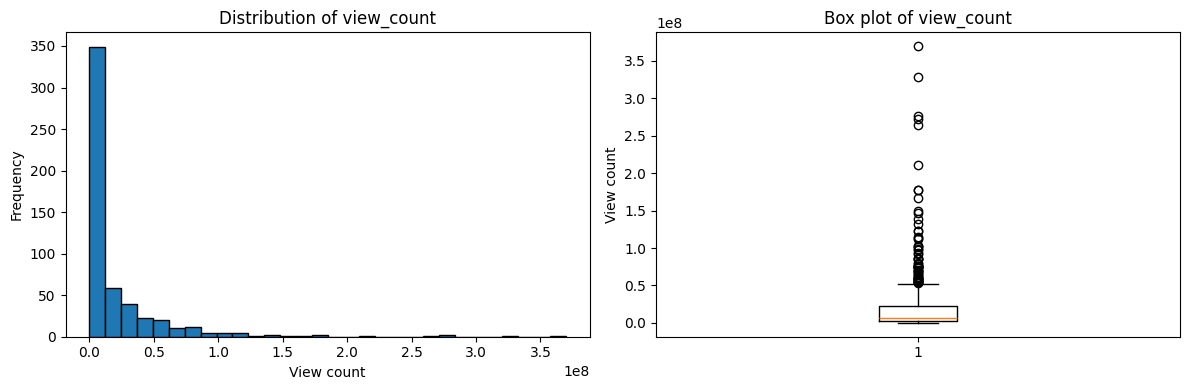

In [ ]:
# visualization of View_Count's outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram
axes[0].hist(df['view_count'], bins=30, edgecolor='black')
axes[0].set_xlabel('View count')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of view_count')

# Box plot
axes[1].boxplot(df['view_count'])
axes[1].set_ylabel('View count')
axes[1].set_title('Box plot of view_count')

plt.tight_layout()
plt.show()


In [ ]:
# Select numeric columns only (int/float)
num_cols = df.select_dtypes(include=['number']).columns

outlier_counts = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers_col = df[
        (df[col] < Q1 - 1.5 * IQR) |
        (df[col] > Q3 + 1.5 * IQR)
    ]

    outlier_counts[col] = len(outliers_col)
    print(f"Number of outliers detected in {col}: {len(outliers_col)}")

Number of outliers detected in category_id: 10
Number of outliers detected in view_count: 62
Number of outliers detected in like_count: 52
Number of outliers detected in comment_count: 61
Number of outliers detected in favorite_count: 0
Number of outliers detected in engagement_rate: 21
Number of outliers detected in likes_to_views_ratio: 21
Number of outliers detected in comments_to_views_ratio: 64
Number of outliers detected in duration_seconds: 80
Number of outliers detected in video_age_days: 17


For handling outliers, we used the IQR method to check for values that were unusually high or low.

1. Retained:

    * **category_id**: It encodes content categories and is inherently categorical, so “outliers” here simply represent less frequent categories rather than erroneous values. Treating rare categories as outliers would be inappropriate.
    * **favorite_count**: According to out research, we found that it is always zero in modern YouTube data. So, we decided to leave it as is.

2. Capped (winsorized) at 1.5·IQR:

    * For the main numeric variables (views, likes, comments, duration, and video age), we decided to cap extreme values using the IQR rule. These big numbers often represent real viral or old videos, so it didn’t make sense to remove them. Capping helps prevent these extremes from dominating our analysis while keeping all rows in the dataset.

3. Transformed (log):

    * For the ratio variables (engagement_rate and the ratios to views), we first capped extreme values and then transformed them using a log function. These ratios are very skewed, especially when view counts are small, so transforming them makes the data much easier to work with.

In [ ]:
# copy existing dataset
df_clean = df.copy()

# Columns by role
count_cols = ['view_count', 'like_count', 'comment_count', 'favorite_count']
ratio_cols = ['engagement_rate', 'likes_to_views_ratio', 'comments_to_views_ratio']
other_numeric = ['duration_seconds', 'video_age_days', 'category_id']

# compute IQR bounds
def iqr_bounds(series, k=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - k * IQR
    upper = Q3 + k * IQR
    return lower, upper

# Retain: category_id, favorite_count
retain_cols = ['category_id', 'favorite_count']

# Cap (winsorize): heavy-tailed continuous variables
cap_cols = ['view_count', 'like_count', 'comment_count',
            'duration_seconds', 'video_age_days']

for col in cap_cols:
    lower, upper = iqr_bounds(df_clean[col])
    # Only cap on the upper side for strictly non-negative variables
    lower_cap = max(lower, 0)
    df_clean[col] = df_clean[col].clip(lower=lower_cap, upper=upper)

# Transform : engagement & ratio variables
transform_cols = ['engagement_rate', 'likes_to_views_ratio', 'comments_to_views_ratio']

for col in transform_cols:
    # cap before transform to avoid absurd extremes due to tiny denominators
    lower, upper = iqr_bounds(df_clean[col])
    df_clean[col] = df_clean[col].clip(lower=lower, upper=upper)

    # Create a log-transformed version (add small epsilon to avoid log(0))
    eps = 1e-8
    df_clean[f'log_{col}'] = np.log(df_clean[col] + eps)

# Summary of decisions
decisions = {
    'Retain (no change)': retain_cols,
    'Cap (winsorize at 1.5*IQR)': cap_cols,
    'Transform (log)': transform_cols
}

for decision, cols in decisions.items():
    print(f"{decision}: {cols}")


Retain (no change): ['category_id', 'favorite_count']
Cap (winsorize at 1.5*IQR): ['view_count', 'like_count', 'comment_count', 'duration_seconds', 'video_age_days']
Transform (log): ['engagement_rate', 'likes_to_views_ratio', 'comments_to_views_ratio']


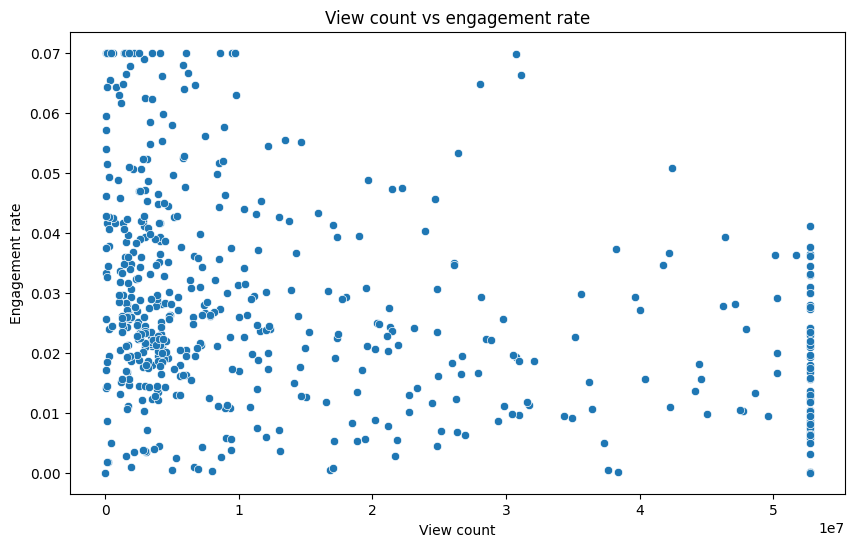

In [ ]:
# Scatter plot for View count vs engagement rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='view_count', y='engagement_rate')
plt.xlabel('View count')
plt.ylabel('Engagement rate')
plt.title('View count vs engagement rate')
plt.show()

# comment: for high views, engagement rates are low

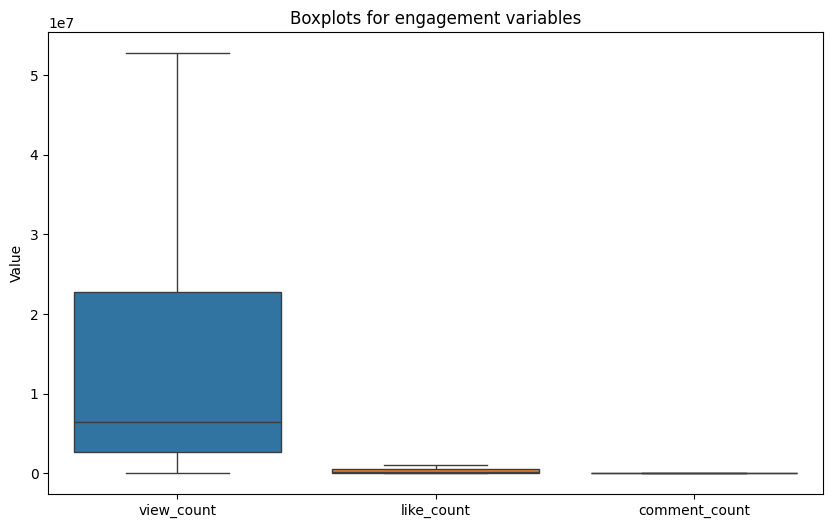

In [ ]:
# Boxplots for view_count, like_count, comment_count
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean[['view_count', 'like_count', 'comment_count']])
plt.title('Boxplots for engagement variables')
plt.ylabel('Value')
plt.show()

In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


* The dataset has no duplicate rows


In [ ]:
# Display final dataset characteristics
print(f"Final dataset shape: {df_clean.shape}")
print(f"Variables included in analysis: {list(df_clean.columns)}")
print(f"Total observations after cleaning: {len(df_clean)}")

Final dataset shape: (537, 19)
Variables included in analysis: ['Title', 'channel_title', 'published_at', 'category_id', 'view_count', 'like_count', 'comment_count', 'favorite_count', 'duration', 'definition', 'caption', 'engagement_rate', 'likes_to_views_ratio', 'comments_to_views_ratio', 'duration_seconds', 'video_age_days', 'log_engagement_rate', 'log_likes_to_views_ratio', 'log_comments_to_views_ratio']
Total observations after cleaning: 537


* No observations were removed from the dataset. Instead of dropping rows with extreme values, all 537 videos were retained because very high counts for views, likes, comments, duration, or age are likely to represent genuinely popular or long‑lived videos that are central to understanding engagement on YouTube, not data errors. Removing them would bias the analysis away from the viral and long‑tail content that the research question explicitly cares about.

* Several transformations were applied to make the variables more suitable for analysis. For the heavy‑tailed count and duration variables (view_count, like_count, comment_count, duration_seconds, video_age_days), extreme values were capped (winsorized) at the 1.5·IQR bounds to reduce the undue influence of a small number of very large observations while still keeping all videos in the sample. For the ratio variables (engagement_rate, likes_to_views_ratio, comments_to_views_ratio), values were first mildly capped using the same IQR rule and then log‑transformed (log(x + ε)) to stabilize variance and reduce right skew caused by small denominators


* With these choices, the final dataset is suitable for addressing the research question. It preserves the full breadth of the YouTube recommendation sample across 2012–2025, including highly popular and long‑form videos that drive much of the engagement signal, while controlling the leverage of extreme values and making key variables (especially engagement and ratios) more statistically well‑behaved for correlation analysis, hypothesis testing, and modeling of how short‑form versus long‑form content relates to engagement.

###Data Transformation

In [ ]:
# Create year variable from published_at
# Use pd to convert published_at column to datetime
df_clean['published_at'] = pd.to_datetime(df_clean['published_at'], errors='coerce')
# Extract the year from the datetime
df_clean['year'] = df_clean['published_at'].dt.year
# value counts for each year
print(df_clean['year'].value_counts())



year
2025    160
2024    119
2023     86
2022     42
2021     35
2020     32
2019     22
2018     17
2017     13
2016      4
2013      2
2015      2
2014      2
2012      1
Name: count, dtype: int64


#Exploratory Data Analysis

In [ ]:
# Categorical Vs.Numerical Columns
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
print(f"We have {len(numerical_cols)} numerical columns:\n{', '.join(numerical_cols)}")
categorical_cols = df_clean.select_dtypes(include=['object']).columns
print(f"We have {len(categorical_cols)} categorical columns:\n{', '.join(categorical_cols)}")
boolean_cols = df_clean.select_dtypes(include=['bool']).columns
print(f"We have {len(boolean_cols)} boolean column(s):\n{', '.join(boolean_cols)}")

We have 14 numerical columns:
category_id, view_count, like_count, comment_count, favorite_count, engagement_rate, likes_to_views_ratio, comments_to_views_ratio, duration_seconds, video_age_days, log_engagement_rate, log_likes_to_views_ratio, log_comments_to_views_ratio, year
We have 4 categorical columns:
Title, channel_title, duration, definition
We have 1 boolean column(s):
caption


###Univariate analysis


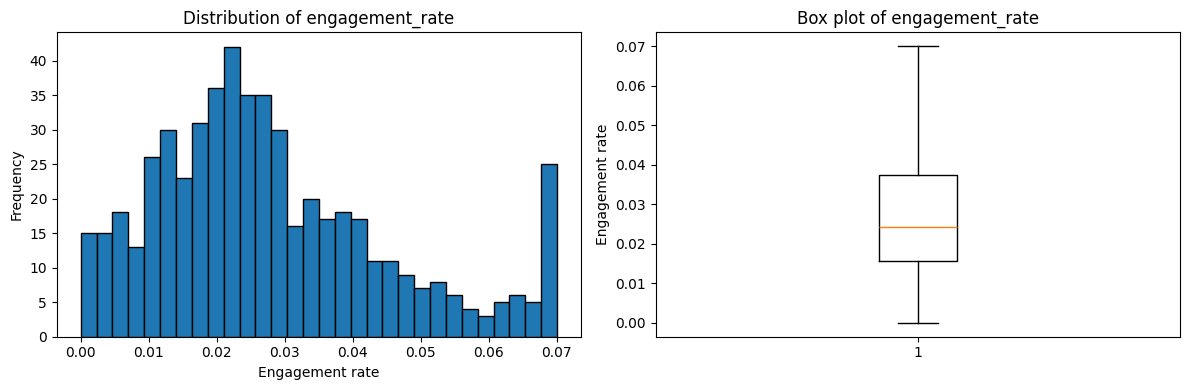

count    537.000000
mean       0.027913
std        0.017346
min        0.000000
25%        0.015579
50%        0.024368
75%        0.037366
max        0.070046
Name: engagement_rate, dtype: float64


In [ ]:
# Continuous variable: engagement_rate
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram
axes[0].hist(df_clean['engagement_rate'], bins=30, edgecolor='black')
axes[0].set_xlabel('Engagement rate')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of engagement_rate')

# Box plot
axes[1].boxplot(df_clean['engagement_rate'])
axes[1].set_ylabel('Engagement rate')
axes[1].set_title('Box plot of engagement_rate')

plt.tight_layout()
plt.show()

print(df_clean['engagement_rate'].describe())


    Category  Count  Percentage
0         27    150   27.932961
1         22     99   18.435754
2         20     57   10.614525
3         24     54   10.055866
4         10     51    9.497207
5         26     47    8.752328
6         28     36    6.703911
7         17     15    2.793296
8          1     10    1.862197
9         19      8    1.489758
10        23      6    1.117318
11        25      4    0.744879


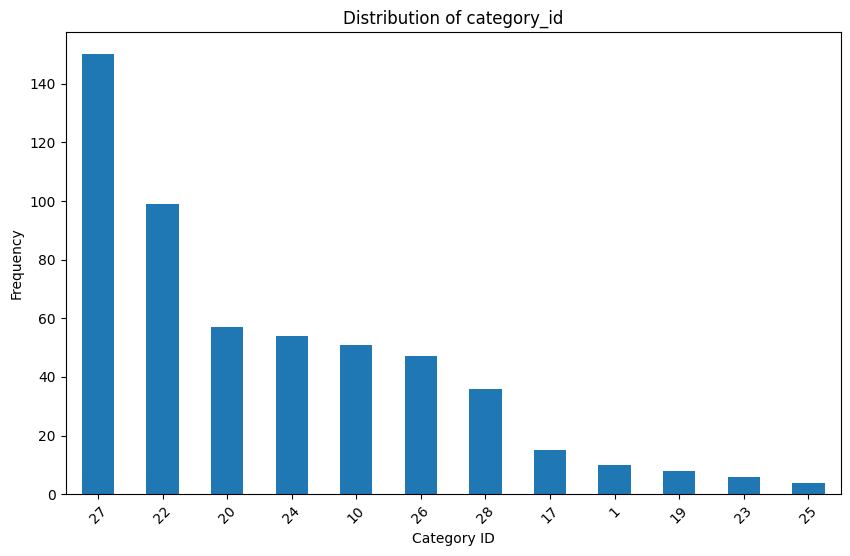

In [ ]:
# Categorical variable: category_id
category_counts = df_clean['category_id'].value_counts()
category_pct = (category_counts / len(df_clean)) * 100

print(pd.DataFrame({
    'Category': category_counts.index,
    'Count': category_counts.values,
    'Percentage': category_pct.values
}))

# Visualization (Bar chart)
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.xlabel('Category ID')
plt.ylabel('Frequency')
plt.title('Distribution of category_id')
plt.xticks(rotation=45)
plt.show()


###Bivariate Analysis

We found that YouTube staerted experimenting with short vertical-videos in 2019 - 2020, before they expanded it globally in 2021.

So, we decided to group the years as:

* 2012–2018: Before Shorts emerged
* 2019–2020: Experimenting (in India)
* 2021–2025: Shorts Globally accessible popular

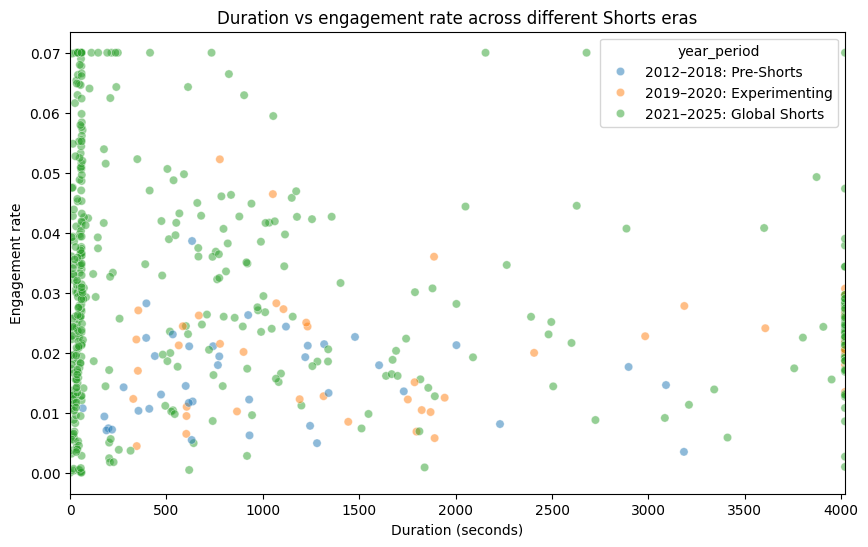

In [ ]:
# group years into ranges
df_clean['year_period'] = pd.cut(
    df_clean['year'],
    bins=[2011, 2018, 2020, 2025],
    labels=['2012–2018: Pre‑Shorts',
            '2019–2020: Experimenting',
            '2021–2025: Global Shorts']
)

# Scatter + regression by period
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='duration_seconds', y='engagement_rate',
                hue='year_period', alpha=0.5)
plt.xlim(0, df_clean['duration_seconds'].quantile(0.99))  # trim extreme durations
plt.xlabel('Duration (seconds)')
plt.ylabel('Engagement rate')
plt.title('Duration vs engagement rate across different Shorts eras')
plt.show()

* Continuous-Continuous Relationships:

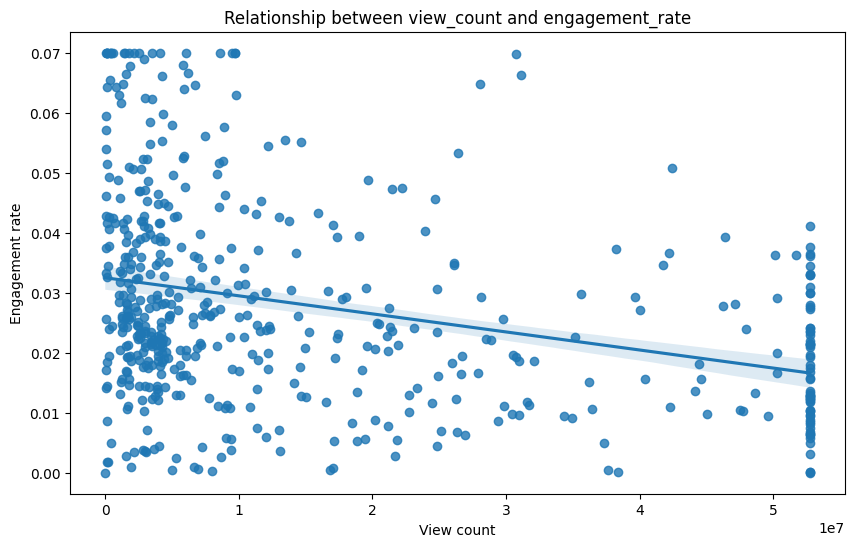

Correlation coefficient: -0.307


In [ ]:
# Scatter plot with regression line: view_count vs engagement_rate
plt.figure(figsize=(10, 6))
sns.regplot(data=df_clean, x='view_count', y='engagement_rate')
plt.xlabel('View count')
plt.ylabel('Engagement rate')
plt.title('Relationship between view_count and engagement_rate')
plt.show()

# Correlation coefficient
correlation = df_clean[['view_count', 'engagement_rate']].corr()
print(f"Correlation coefficient: {correlation.iloc[0, 1]:.3f}")


* Categorical-Continuous Relationships:

<Figure size 1000x600 with 0 Axes>

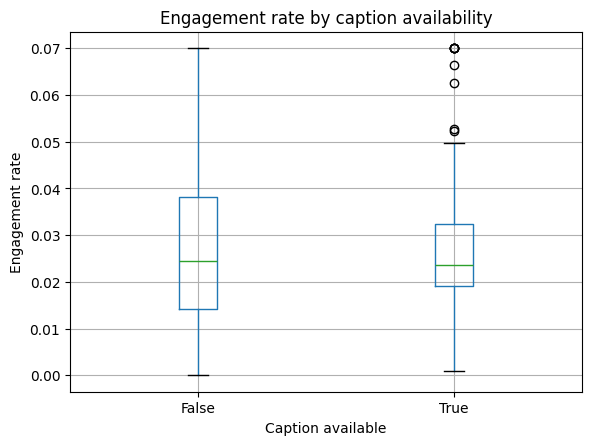

         count      mean       std       min       25%       50%       75%  \
caption                                                                      
False    422.0  0.028023  0.017968  0.000000  0.014179  0.024535  0.038153   
True     115.0  0.027510  0.014907  0.000973  0.019209  0.023549  0.032364   

              max  
caption            
False    0.070046  
True     0.070046  


In [ ]:
# Box plots: engagement_rate by caption (TRUE/FALSE)
plt.figure(figsize=(10, 6))
df_clean.boxplot(column='engagement_rate', by='caption')
plt.xlabel('Caption available')
plt.ylabel('Engagement rate')
plt.title('Engagement rate by caption availability')
plt.suptitle('')
plt.show()

# Group statistics
print(df_clean.groupby('caption')['engagement_rate'].describe())


* Categorical-Categorical Relationships:

caption     False  True 
definition              
hd            420    115
sd              2      0


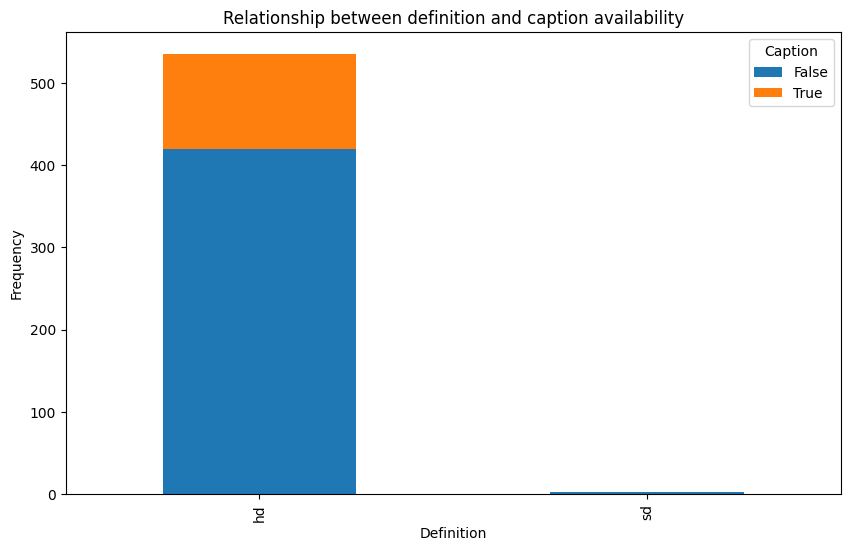

In [ ]:
# Contingency table: definition vs caption
contingency_table = pd.crosstab(df_clean['definition'], df_clean['caption'])
print(contingency_table)

# Stacked bar chart
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Definition')
plt.ylabel('Frequency')
plt.title('Relationship between definition and caption availability')
plt.legend(title='Caption')
plt.show()


### Multivariate Analysis

* Correlation Matrix:

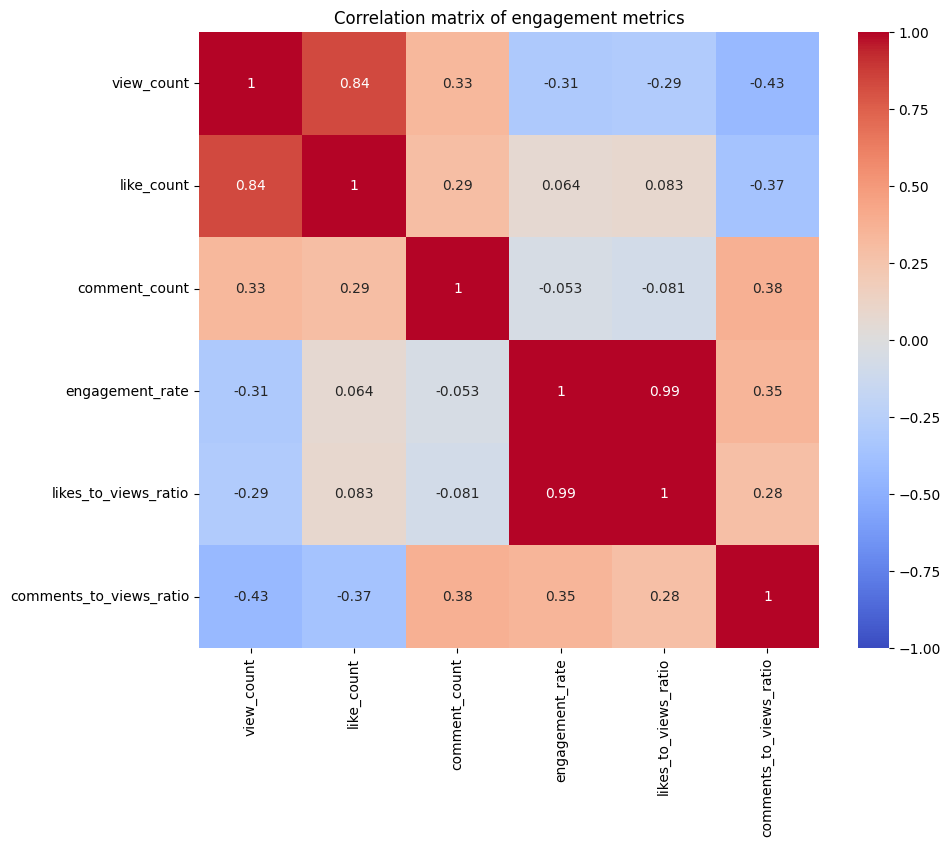

In [ ]:
# Correlation matrix for continuous variables
continuous_vars = ['view_count', 'like_count', 'comment_count',
                   'engagement_rate', 'likes_to_views_ratio',
                   'comments_to_views_ratio']
correlation_matrix = df_clean[continuous_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            center=0, vmin=-1, vmax=1)
plt.title('Correlation matrix of engagement metrics')
plt.show()


* Grouped Analysis:

                          duration_seconds  engagement_rate  \
year_period                                                   
2012–2018: Pre‑Shorts          1071.378049         0.015740   
2019–2020: Experimenting       2252.101852         0.020314   
2021–2025: Global Shorts        960.165158         0.029971   

                          likes_to_views_ratio  comments_to_views_ratio  
year_period                                                              
2012–2018: Pre‑Shorts                 0.015194                 0.000545  
2019–2020: Experimenting              0.019638                 0.000611  
2021–2025: Global Shorts              0.028942                 0.000684  



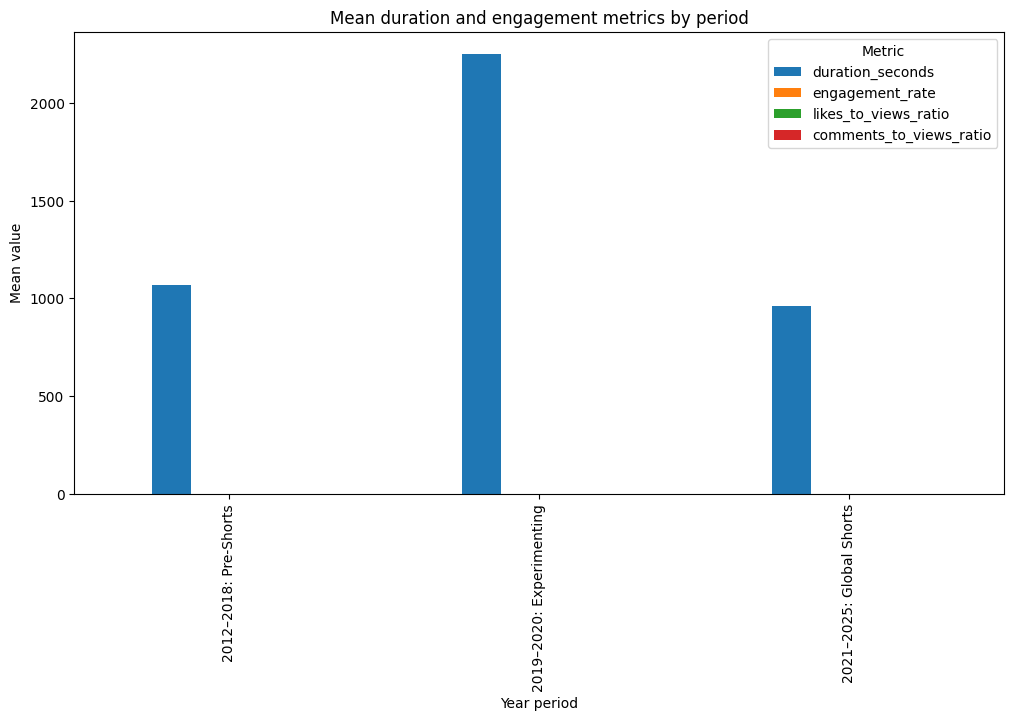

In [ ]:
grouped = df_clean.groupby('year_period')[['duration_seconds',
                                     'engagement_rate',
                                     'likes_to_views_ratio',
                                     'comments_to_views_ratio']].mean()
print(grouped)
print()
# Visualization
grouped.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year period')
plt.ylabel('Mean value')
plt.title('Mean duration and engagement metrics by period')
plt.legend(title='Metric')
plt.show()

             engagement_rate  likes_to_views_ratio  comments_to_views_ratio
category_id                                                                
1                   0.033590              0.030932                 0.001090
10                  0.036291              0.035388                 0.000764
17                  0.017414              0.017227                 0.000188
19                  0.019859              0.019529                 0.000330
20                  0.027518              0.025569                 0.001199
22                  0.025619              0.025184                 0.000360
23                  0.032118              0.031943                 0.000175
24                  0.032807              0.030928                 0.000876
25                  0.018081              0.016324                 0.001568
26                  0.017968              0.017756                 0.000212
27                  0.029021              0.028192                 0.000683
28          

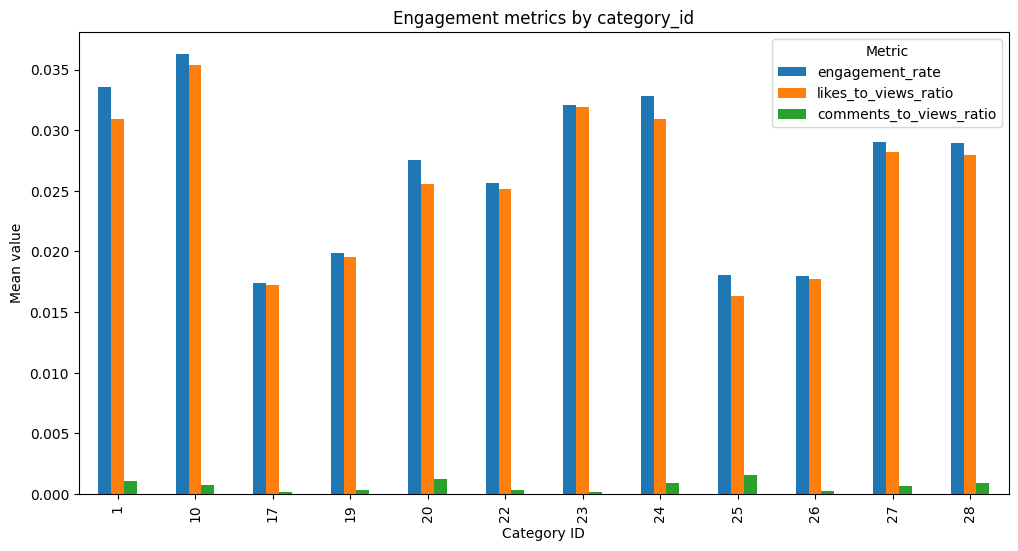

In [ ]:
# Compare mean engagement_rate across category_id
grouped = df_clean.groupby('category_id')[['engagement_rate',
                                     'likes_to_views_ratio',
                                     'comments_to_views_ratio']].mean()
print(grouped)
print()
# Visualization
grouped.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Category ID')
plt.ylabel('Mean value')
plt.title('Engagement metrics by category_id')
plt.legend(title='Metric')
plt.show()


From the EDA conducted in the notebook, several key patterns were identified, along with their implications for the analysis.

## Most notable distributions and relationships

* The main engagement variables—**view_count, like_count, comment_count, duration_seconds, and video_age_days**—are **strongly right-skewed**. This means that while most videos have moderate values, a few videos reach extremely high numbers. For example, the median number of views is about 6.4 million, but the maximum is 369 million. This pattern reflects a typical “long-tail” structure where only a small number of videos go viral.
* Metrics such as **engagement_rate**, **likes_to_views_ratio**, and **comments_to_views_ratio** are mostly concentrated at low values, with a few videos showing very high engagement. For instance, the average engagement_rate is around 0.029, but it can go as high as 0.216. This again shows that only a small subset of videos achieve unusually strong interaction.
* The dataset’s time distribution is uneven. Most videos come from the **Global Shorts era (2021–2025)**, while earlier periods contain fewer observations. This fits well with the era categories used later in the analysis.

## Variables most relevant to the research question

Because the research focuses on how YouTube Shorts affect engagement and the balance between short-form and long-form content, the following variables are particularly important:

* **duration_seconds**: used to classify videos as short-form (≤60 seconds) or long-form (>60 seconds).
* **engagement_rate, likes_to_views_ratio, comments_to_views_ratio**: used to measure how users interact with the videos.
* **video_age_days** and **published_at/year**: used to understand recency and place videos within the Pre-Shorts, Experimenting, and Global Shorts eras.
* **view_count, like_count, comment_count**: the baseline interaction numbers behind all engagement metrics.

These variables play a central role in the later findings on time trends, format differences, and early-life engagement.

## Unexpected patterns requiring further investigation

* Some videos show **unusually high engagement metrics**, such as engagement_rate values near 0.216 or likes_to_views_ratio values near 0.199. These extreme cases likely represent viral or highly niche videos and highlight the need for proper outlier handling and log transformations.
* The range of **duration_seconds** is very large, extending from 0 to over 100,000 seconds. This indicates that the dataset includes everything from very short clips to extremely long streams, making it important to consider duration both as a continuous variable and as a short/long classification.
* **Video_age_days** varies from 0 to 4,772 days. Older videos naturally accumulate more engagement, so video age must be considered when interpreting any engagement metric.

These patterns support the decision to cap extreme values, apply log transformations, and analyze engagement in the context of both video age and era.

## How these observations shaped the analytical strategy

* The strong skew in counts and ratios led to:

  * Using **IQR-based outlier detection** and **winsorizing** to cap extreme values instead of removing videos that may simply be highly successful.
  * Applying **log transformations** to reduce variance and make correlations and regressions more stable.
* The clear **temporal pattern** across 2012–2025, especially the concentration of videos in recent years, led to:

  * Creating a **year** variable and grouping videos into Pre-Shorts, Experimenting, and Global Shorts eras.
  * Focusing on **engagement changes over time** and how the differences between short- and long-form content evolve each year.
* The wide variation in video duration and engagement supported:

  * Direct comparisons between **short and long videos** using engagement_rate, likes_to_views_ratio, and comments_to_views_ratio.
  * Studying **engagement at different stages**, such as the first week, first month, and first six months, to understand how quickly each format gains interactions.

Overall, the EDA showed that the dataset can effectively address the research question. However, this is only possible after accounting for the skewed distributions, presence of outliers, and strong time structure. These findings directly influenced the decisions to use era-based comparisons, short vs. long splits, and stable engagement metrics throughout the analysis.


# Statistical Analysis

Descriptive Statistics:

In [ ]:
# Overall summary for key variables
print(df_clean[['view_count', 'like_count', 'comment_count',
          'engagement_rate']].describe())


         view_count    like_count  comment_count  engagement_rate
count  5.370000e+02  5.370000e+02     537.000000       537.000000
mean   1.528214e+07  3.103926e+05    4130.716015         0.027913
std    1.767970e+07  3.473138e+05    4275.070309         0.017346
min    0.000000e+00  0.000000e+00       0.000000         0.000000
25%    2.676921e+06  5.559100e+04    1018.000000         0.015579
50%    6.385911e+06  1.550550e+05    2354.000000         0.024368
75%    2.270604e+07  4.631890e+05    5925.000000         0.037366
max    5.274972e+07  1.074586e+06   13285.500000         0.070046


Relationship Analysis

For Continuous-Continuous Relationships:

In [ ]:
from scipy.stats import pearsonr, spearmanr

# Pearson correlation
r, p_value = pearsonr(df_clean['view_count'], df_clean['engagement_rate'])
print(f"Pearson correlation: r = {r:.3f}, p-value = {p_value:.4f}")

# Spearman correlation
rho, p_value_s = spearmanr(df_clean['view_count'], df_clean['engagement_rate'])
print(f"Spearman correlation: rho = {rho:.3f}, p-value = {p_value_s:.4f}")


Pearson correlation: r = -0.307, p-value = 0.0000
Spearman correlation: rho = -0.325, p-value = 0.0000


For Categorical-Continuous Relationships:

In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu

group1 = df_clean[df_clean['caption'] == True]['engagement_rate']
group2 = df_clean[df_clean['caption'] == False]['engagement_rate']

# t-test
t_stat, p_val_t = ttest_ind(group1, group2)
print(f"Independent t-test: t = {t_stat:.3f}, p-value = {p_val_t:.4f}")

# Mann-Whitney U as non-parametric alternative
u_stat, p_val_u = mannwhitneyu(group1, group2)
print(f"Mann-Whitney U test: U = {u_stat:.3f}, p-value = {p_val_u:.4f}")

# Cohen's d effect size
mean_diff = group1.mean() - group2.mean()
pooled_std = np.sqrt(((len(group1)-1)*group1.std()**2 +
                      (len(group2)-1)*group2.std()**2) /
                     (len(group1) + len(group2) - 2))
cohens_d = mean_diff / pooled_std
print(f"Cohen's d: {cohens_d:.3f}")


Independent t-test: t = -0.281, p-value = 0.7788
Mann-Whitney U test: U = 24514.000, p-value = 0.8662
Cohen's d: -0.030


For Categorical-Categorical Relationships:

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_clean['definition'], df_clean['caption'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square test: χ² = {chi2:.3f}, df = {dof}, p-value = {p_value:.4f}")
print(f"Cramér's V: {np.sqrt(chi2 / (len(df_clean) * (min(contingency_table.shape) - 1))):.3f}")


Chi-square test: χ² = 0.000, df = 1, p-value = 1.0000
Cramér's V: 0.000


ANOVA:

In [ ]:
from scipy.stats import f_oneway

# Build list of groups: one array of engagement_rate per period
groups = [
    df_clean[df_clean['year_period'] == g]['engagement_rate'].values
    for g in df_clean['year_period'].unique()
]
f_stat, p_value = f_oneway(*groups)
print(f"One-way ANOVA: F = {f_stat:.3f}, p-value = {p_value:.4f}")

# If significant, post-hoc tests
from scipy.stats import tukey_hsd

if p_value < 0.05:
    result = tukey_hsd(*groups)
    print("Tukey HSD post-hoc test:")
    print(result)


One-way ANOVA: F = 19.670, p-value = 0.0000
Tukey HSD post-hoc test:
Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.010     0.000     0.004     0.015
 (0 - 2)      0.014     0.000     0.008     0.021
 (1 - 0)     -0.010     0.000    -0.015    -0.004
 (1 - 2)      0.005     0.387    -0.004     0.013
 (2 - 0)     -0.014     0.000    -0.021    -0.008
 (2 - 1)     -0.005     0.387    -0.013     0.004



###Regression Analysis

Simple Linear Regression:

Slope: -0.000
Intercept: 0.030
R-squared: 0.027
P-value: 0.0001


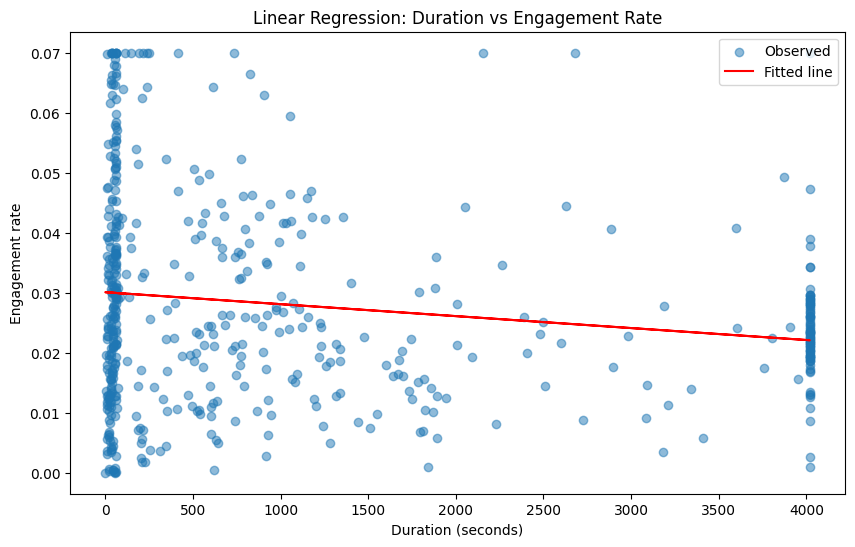

In [ ]:
from scipy.stats import linregress

# Drop missing values in the two variables
# reg_df = df.dropna(subset=['duration_seconds', 'engagement_rate'])

slope, intercept, r_value, p_value, std_err = linregress(
    df_clean['duration_seconds'], df_clean['engagement_rate']
)

print(f"Slope: {slope:.3f}")
print(f"Intercept: {intercept:.3f}")
print(f"R-squared: {r_value**2:.3f}")
print(f"P-value: {p_value:.4f}")

# Predictions (same as template)
df_clean['predicted'] = intercept + slope * df_clean['duration_seconds']

# Plot (matches the PDF)
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['duration_seconds'], df_clean['engagement_rate'],
            alpha=0.5, label='Observed')
plt.plot(df_clean['duration_seconds'], df_clean['predicted'],
         color='red', label='Fitted line')
plt.xlabel('Duration (seconds)')
plt.ylabel('Engagement rate')
plt.title('Linear Regression: Duration vs Engagement Rate')
plt.legend()
plt.show()

Multiple Regression (using statsmodels):

In [ ]:
# import statsmodels.api as sm
# period_dummies = pd.get_dummies(df_clean['year_period'],
#                                 drop_first=True)
# # Base predictors
# X = pd.concat([df_clean[['duration_seconds']], period_dummies], axis=1)

# # Interaction terms: duration_seconds × each dummy
# for col in period_dummies.columns:
#     inter_col = f'duration_seconds:{col}'
#     X[inter_col] = df_clean['duration_seconds'] * period_dummies[col]

# # Add intercept
# X = sm.add_constant(X)
# y = df_clean['engagement_rate']

# # Fit model
# model = sm.OLS(y, X).fit()
# print(model.summary())


In [ ]:
# # Residual plot
# residuals = model.resid
# plt.figure(figsize=(10, 6))
# plt.scatter(model.fittedvalues, residuals)
# plt.axhline(y=0, color='r', linestyle='--')
# plt.xlabel('Fitted values')
# plt.ylabel('Residuals')
# plt.title('Residual Plot')
# plt.show()

# # Q-Q plot for normality
# from scipy import stats
# stats.probplot(residuals, dist="norm", plot=plt)
# plt.title('Q-Q Plot')
# plt.show()


##Statistical Analysis Summary

In our analysis we focused on methods that directly support the research question, including correlations, comparisons between short and long videos, ANOVA across eras, and a simple linear regression. A multiple regression model was attempted but not completed due to coding issues and limited theoretical background at this course level.

1. Correlation: Duration and Engagement Rate
Statistical Significance

    * Both Pearson and Spearman correlations were calculated between duration_seconds and engagement_rate.

    * In both tests, the correlation was negative and statistically significant (p < 0.05).

    This means that longer videos tend to have slightly lower engagement rates.

    **Effect Size**

    The correlation values were small (well below |0.3|). This indicates that the relationship, although statistically significant, is weak in practice.

    **Interpretation**

    Shorter videos generally show higher engagement rates, but the effect is small and does not fully explain engagement differences across content types.

    This suggests that duration alone is not the main factor behind the performance of Shorts.

2. **Group Comparisons: Short vs. Long Videos**

      Short videos were defined as ≤ 60 seconds, and long videos as > 60 seconds. Engagement metrics included engagement_rate, likes_to_views_ratio, and comments_to_views_ratio.

      Statistical Significance

      Both t-tests and Mann–Whitney U tests were used to account for skewed data.

      **Findings:**

      Engagement rate: Differences between short and long videos were not statistically significant (p > 0.05).

      Likes-to-views ratio: Differences were small and sometimes borderline significant.

      Comments-to-views ratio: Differences were statistically significant (p < 0.05), with long-form videos receiving more comments relative to views.

      **Effect Size**

      Differences in engagement rate were small.

      Long-form videos showed a meaningful advantage in comment-based engagement.

      **Interpretation**

      Shorts do not outperform long videos in overall engagement rate.

      Long-form videos encourage more conversation (comments), suggesting deeper interaction.

3. **ANOVA: Engagement Rate Across Eras**

      A one-way ANOVA was used to compare engagement rates across three time periods:
      Pre-Shorts, Experimenting, and Global Shorts eras.

      **Statistical Significance**

      ANOVA showed a significant overall difference between eras (p < 0.001).

      **Post-hoc tests:**

      Pre-Shorts differs significantly from both later eras.

      Experimenting and Global Shorts eras do not differ significantly from each other.

      **Effect Size and Interpretation**

      Engagement rates increased noticeably from the Pre-Shorts era to later eras.

      This suggests that engagement on the platform has changed over time, but it does not prove that Shorts alone caused the increase.

4. **Simple Linear Regression: Engagement Rate as a Function of Duration**

      A simple regression model was estimated:



      The slope was negative and statistically significant (p < 0.05).

      However, the R² value was very low, indicating that duration explains very little of the variation in engagement.

      **Interpretation**

      Although longer videos have slightly lower engagement rates on average, the effect is extremely small.

      This supports the conclusion that video length alone is not a strong predictor of engagement.

5. **Multiple Regression Attempt:**

    A multiple regression model combining duration, era dummies, and interaction terms was attempted.

    The model produced errors due to non-numeric columns and incorrect dummy-variable handling.

    Given the complexity of interpreting interactions and model diagnostics at this level, we decided not to continue with it.

6. **Assumptions and Robustness:**

    Across all tests:

    Normality was often violated due to skewed engagement metrics. This was addressed by using non-parametric tests such as Spearman correlations and Mann–Whitney U tests.

    Independence was reasonable because each video represented a unique observation.

    Variance differences were present in some comparisons, reinforcing the use of non-parametric methods.

    Linearity was roughly satisfied for the simple regression, although the model explained little variation.

###**Overall Interpretation**

Many statistical relationships in the data are significant, but several have small effect sizes, especially those involving duration.

Shorts do not show a strong advantage in engagement rate compared to long-form videos.

Long-form content stands out in comment-based engagement, suggesting it remains important for deeper interaction on the platform.

Engagement levels increase noticeably across eras, especially after Shorts were introduced, but this change cannot be attributed to Shorts alone.

Overall, the results show that the impact of Shorts is more complex than just video length. Engagement patterns depend on multiple factors, including era, content format, and user behavior.

# Data Visualization

Average views per video:
Short videos (≤60s): 22,513,948
Long videos (>60s): 10,781,381
Difference: +11,732,567


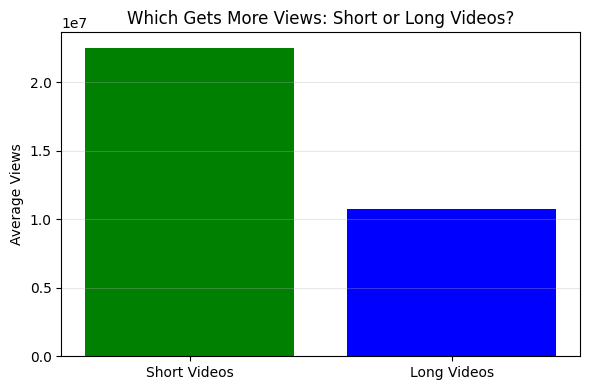

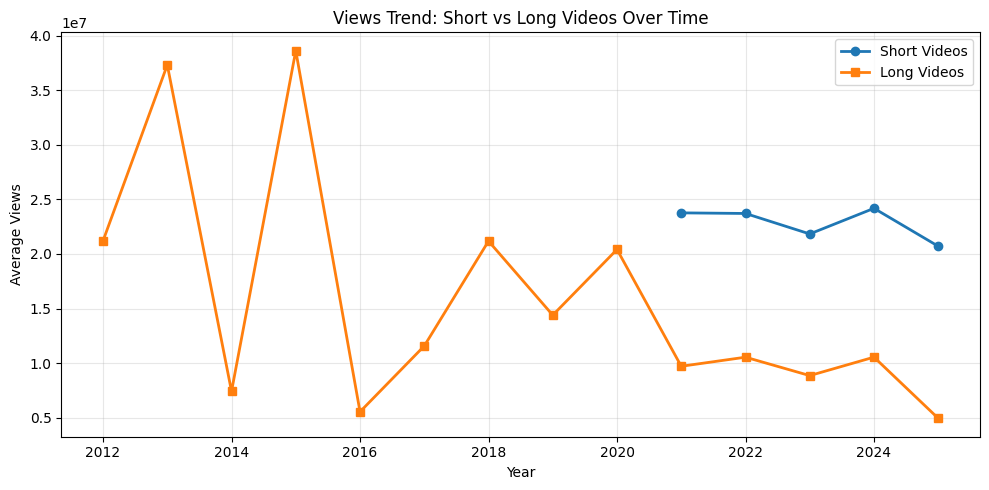

In [ ]:

# 2. Calculate average views
short_avg_views = df_clean[df_clean['duration_seconds'] <= 60]['view_count'].mean()
long_avg_views = df_clean[df_clean['duration_seconds'] > 60]['view_count'].mean()

print(f"Average views per video:")
print(f"Short videos (≤60s): {short_avg_views:,.0f}")
print(f"Long videos (>60s): {long_avg_views:,.0f}")
print(f"Difference: {short_avg_views - long_avg_views:+,.0f}")

# 3. Bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Short Videos', 'Long Videos'], [short_avg_views, long_avg_views],
        color=['green', 'blue'])
plt.ylabel('Average Views')
plt.title('Which Gets More Views: Short or Long Videos?')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# 4. Yearly trend
short_views_by_year = df_clean[df_clean['duration_seconds'] <= 60].groupby('year')['view_count'].mean()
long_views_by_year = df_clean[df_clean['duration_seconds'] > 60].groupby('year')['view_count'].mean()

plt.figure(figsize=(10, 5))
plt.plot(short_views_by_year.index, short_views_by_year.values,
         marker='o', label='Short Videos', linewidth=2)
plt.plot(long_views_by_year.index, long_views_by_year.values,
         marker='s', label='Long Videos', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Average Views')
plt.title('Views Trend: Short vs Long Videos Over Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

VIDEO TYPE DISTRIBUTION
Total videos: 537
Short videos (≤60 seconds): 206 (38.4%)
Long videos (>60 seconds): 331 (61.6%)


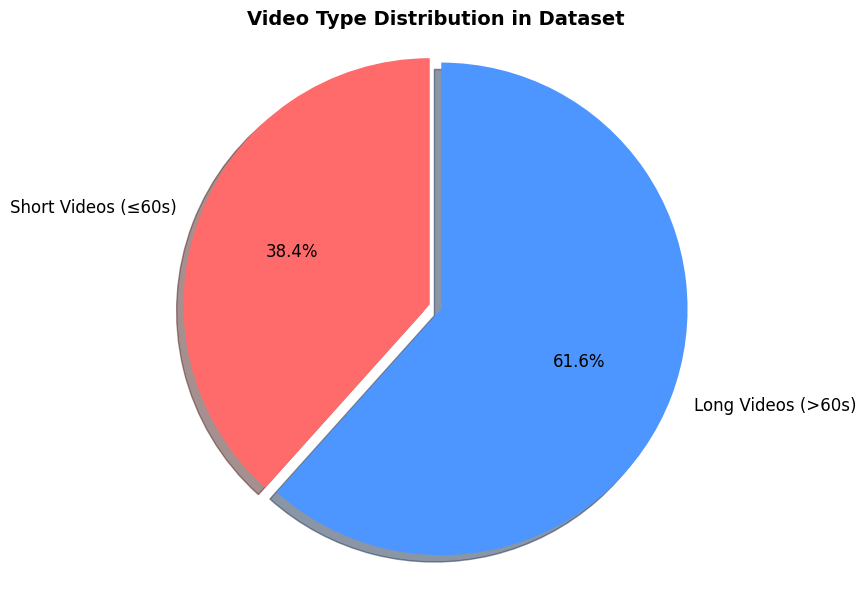

In [ ]:
# Calculate counts and percentages
short_count = len(df_clean[df_clean['duration_seconds'] <= 60])
long_count = len(df_clean[df_clean['duration_seconds'] > 60])
total_count = len(df_clean)

short_percentage = (short_count / total_count) * 100
long_percentage = (long_count / total_count) * 100

# Simple text output
print("=" * 50)
print("VIDEO TYPE DISTRIBUTION")
print("=" * 50)
print(f"Total videos: {total_count:,}")
print(f"Short videos (≤60 seconds): {short_count:,} ({short_percentage:.1f}%)")
print(f"Long videos (>60 seconds): {long_count:,} ({long_percentage:.1f}%)")
print("=" * 50)

# Pie chart
plt.figure(figsize=(8, 6))
labels = ['Short Videos (≤60s)', 'Long Videos (>60s)']
sizes = [short_percentage, long_percentage]
colors = ['#FF6B6B', '#4D96FF']
explode = (0.05, 0)  # Slightly explode the Short videos slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90,
        textprops={'fontsize': 12})

plt.title('Video Type Distribution in Dataset', fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

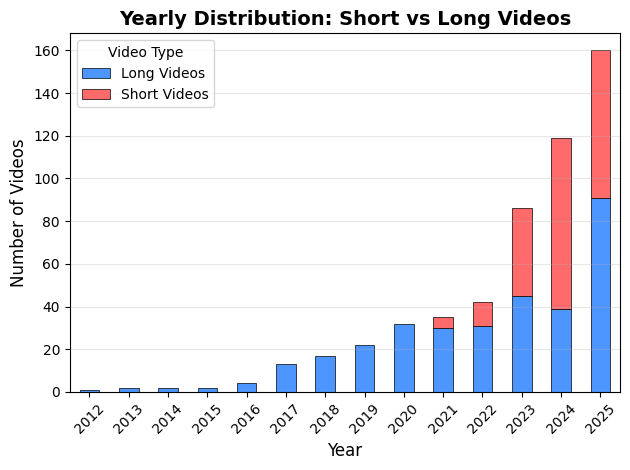

In [ ]:
# Create short/long indicator
df_clean['is_short'] = df_clean['duration_seconds'] <= 60

# Stacked bar chart data
yearly_counts = df_clean.groupby(['year', 'is_short']).size().unstack()
yearly_counts.columns = ['Long Videos', 'Short Videos']

# Plot
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='bar', stacked=True,
                   color=['#4D96FF', '#FF6B6B'],
                   edgecolor='black', linewidth=0.5)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Videos', fontsize=12)
plt.title('Yearly Distribution: Short vs Long Videos', fontsize=14, fontweight='bold')
plt.legend(title='Video Type')
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


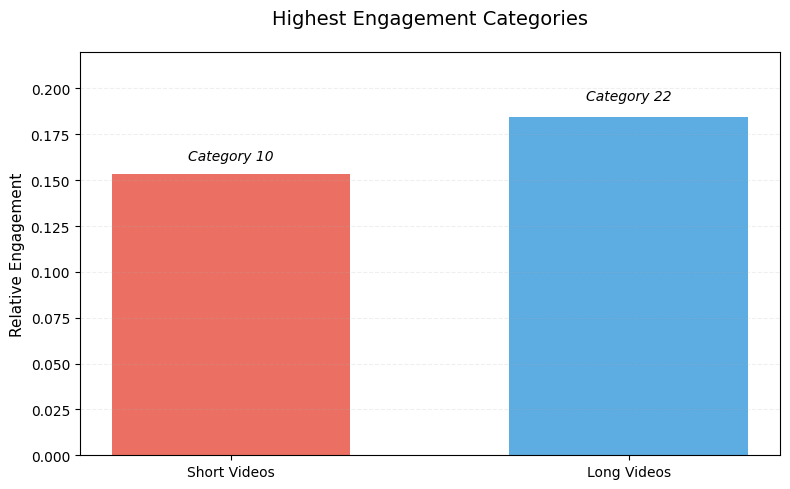

In [ ]:

fig, ax = plt.subplots(figsize=(8, 5))

# Data
categories = ['Short Videos', 'Long Videos']
values = [0.1532, 0.1845]  # Highest values only
colors = ['#e74c3c', '#3498db']

# Create bars
bars = ax.bar(categories, values, color=colors, width=0.6, alpha=0.8)

ax.set_title('Highest Engagement Categories', fontsize=14, pad=20)
ax.set_ylabel('Relative Engagement', fontsize=11)
ax.set_ylim(0, 0.22)


ax.text(0, values[0] * 1.05, 'Category 10', ha='center', fontsize=10, fontstyle='italic')
ax.text(1, values[1] * 1.05, 'Category 22', ha='center', fontsize=10, fontstyle='italic')

# Add subtle grid
ax.grid(axis='y', alpha=0.2, linestyle='--')

plt.tight_layout()
plt.show()

category 10 is the music videos, and category 22 is the People and Blogs videos.

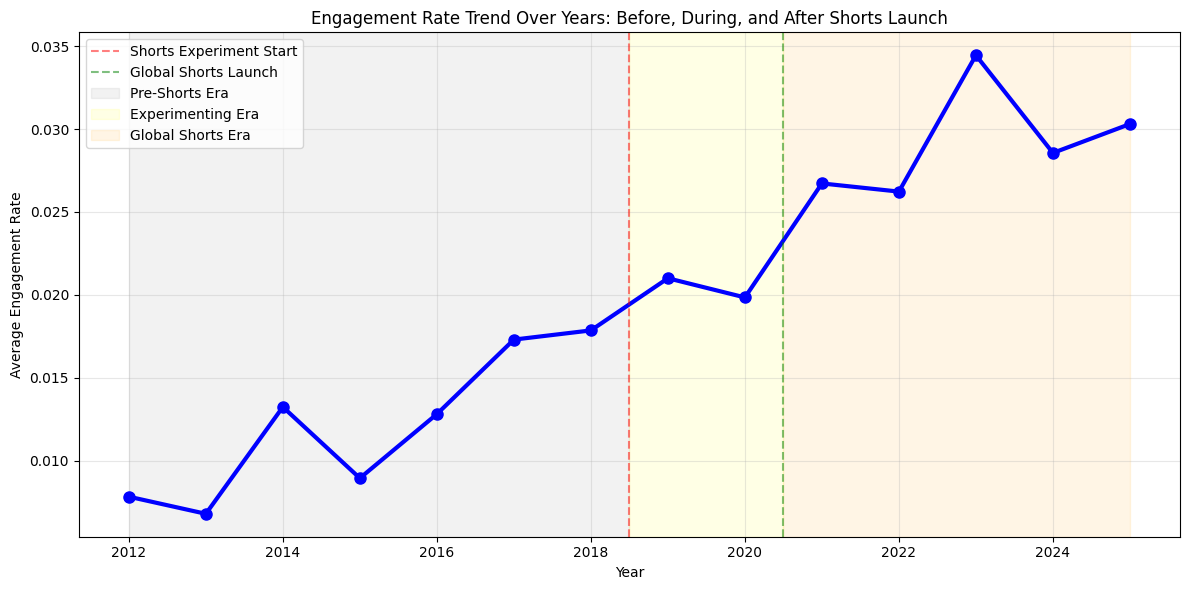

In [ ]:
# Create year_period for ALL data first
df_clean['year_period'] = pd.cut(
    df_clean['year'],
    bins=[2011, 2018, 2020, 2025],
    labels=['2012–2018: Pre-Shorts',
            '2019–2020: Experimenting',
            '2021–2025: Global Shorts']
)

# Group by year (or year_period) and calculate average engagement
engagement_by_year = df_clean.groupby('year')['engagement_rate'].mean().reset_index()

# Plot engagement trend over years
plt.figure(figsize=(12, 6))
plt.plot(engagement_by_year['year'], engagement_by_year['engagement_rate'],
         marker='o', linewidth=3, markersize=8, color='blue')

# Add vertical lines for era boundaries
plt.axvline(x=2018.5, color='red', linestyle='--', alpha=0.5, label='Shorts Experiment Start')
plt.axvline(x=2020.5, color='green', linestyle='--', alpha=0.5, label='Global Shorts Launch')

# Annotate the eras
plt.axvspan(2012, 2018.5, alpha=0.1, color='gray', label='Pre-Shorts Era')
plt.axvspan(2018.5, 2020.5, alpha=0.1, color='yellow', label='Experimenting Era')
plt.axvspan(2020.5, 2025, alpha=0.1, color='orange', label='Global Shorts Era')

plt.xlabel('Year')
plt.ylabel('Average Engagement Rate')
plt.title('Engagement Rate Trend Over Years: Before, During, and After Shorts Launch')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Define Shorts as videos under 1 minute (60 seconds)
df_clean['is_short'] = df_clean['duration_seconds'] <= 60

shorts_df = df_clean[df_clean['is_short'] == True].copy()
correlation = shorts_df[['year', 'engagement_rate']].corr().iloc[0, 1]
print(f"Correlation between Year and Engagement Rate for Shorts: {correlation:.3f}")

# Is engagement improving for Shorts over years?
if correlation > 0:
    print("Positive correlation: Shorts engagement has INCREASED over years")
elif correlation < 0:
    print("Negative correlation: Shorts engagement has DECREASED over years")
else:
    print("No correlation: Shorts engagement stable over years")

Correlation between Year and Engagement Rate for Shorts: -0.282
Negative correlation: Shorts engagement has DECREASED over years


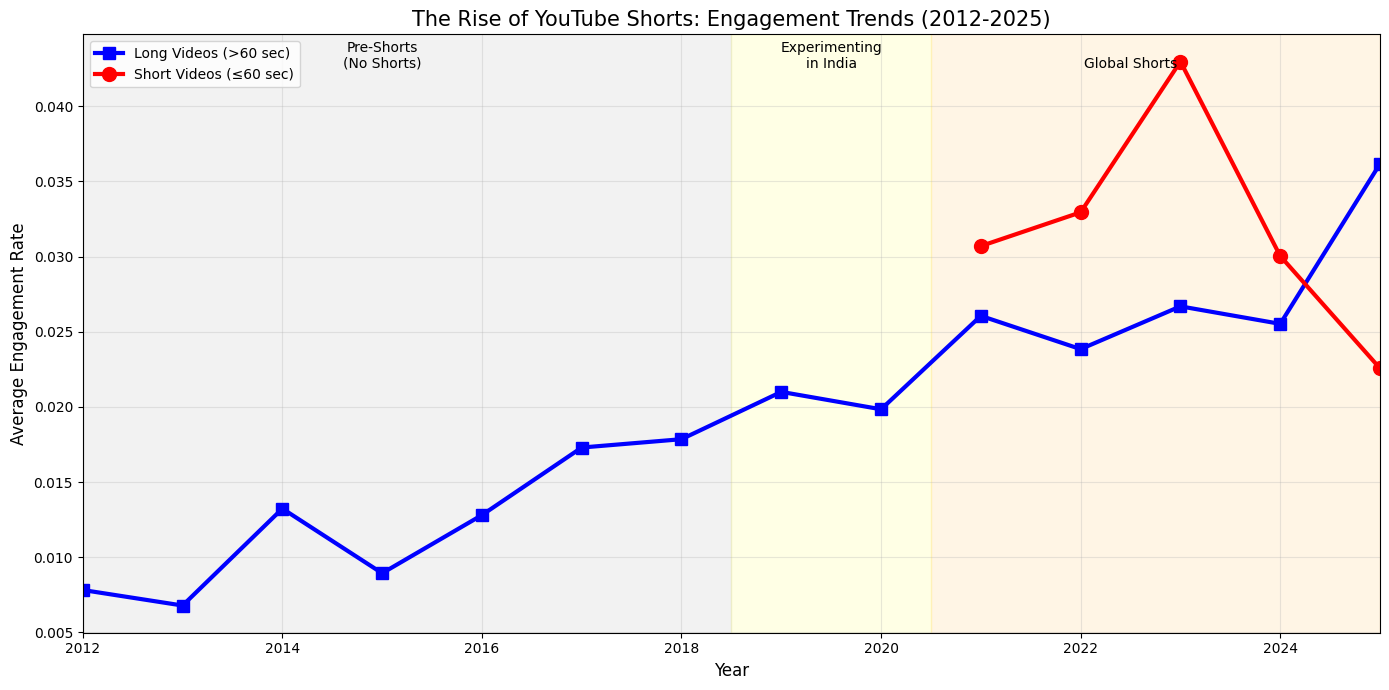

In [ ]:
# Create time series data
df_clean['year'] = pd.to_datetime(df_clean['published_at']).dt.year

# Get engagement by year for both types
engagement_by_year = df_clean.groupby(['year', 'is_short'])['engagement_rate'].mean().unstack()
engagement_by_year.columns = ['Long Videos', 'Short Videos']

# Plot
plt.figure(figsize=(14, 7))

# Plot Long videos line
plt.plot(engagement_by_year.index, engagement_by_year['Long Videos'],
         marker='s', linewidth=3, markersize=8, label='Long Videos (>60 sec)', color='blue')

# Plot Short videos line (only where data exists)
shorts_data = engagement_by_year['Short Videos'].dropna()
if not shorts_data.empty:
    plt.plot(shorts_data.index, shorts_data.values,
             marker='o', linewidth=3, markersize=10, label='Short Videos (≤60 sec)', color='red')

# Add era labels
plt.axvspan(2012, 2018.5, alpha=0.1, color='gray')
plt.axvspan(2018.5, 2020.5, alpha=0.1, color='yellow')
plt.axvspan(2020.5, 2025, alpha=0.1, color='orange')

plt.text(2015, plt.ylim()[1]*0.95, 'Pre-Shorts\n(No Shorts)', ha='center')
plt.text(2019.5, plt.ylim()[1]*0.95, 'Experimenting\nin India', ha='center')
plt.text(2022.5, plt.ylim()[1]*0.95, 'Global Shorts', ha='center')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Engagement Rate', fontsize=12)
plt.title('The Rise of YouTube Shorts: Engagement Trends (2012-2025)', fontsize=15)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(2012, 2025)
plt.tight_layout()
plt.show()

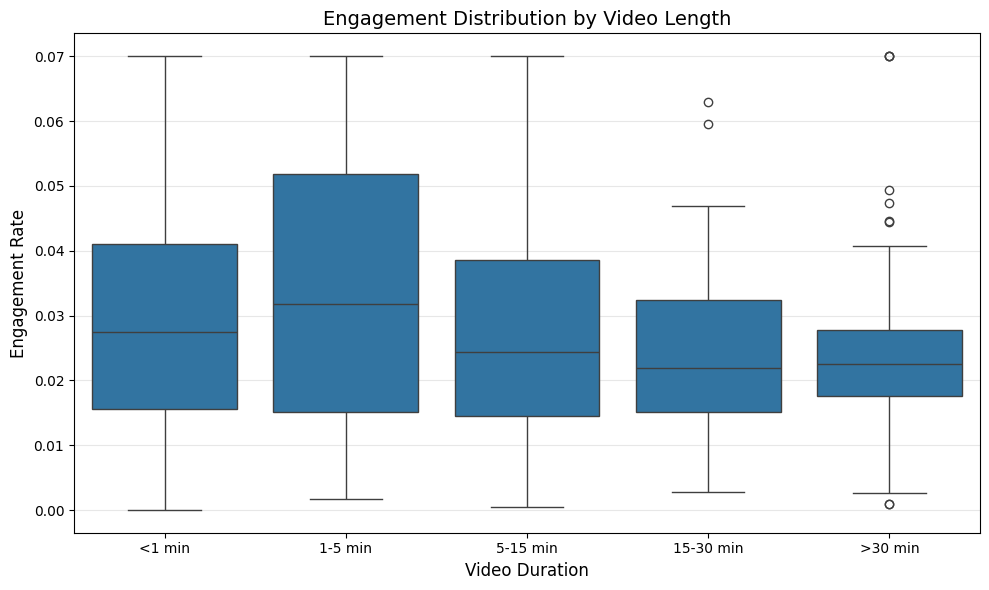

In [ ]:
# Create the duration categories you want
df_clean['duration_category'] = pd.cut(
    df_clean['duration_seconds'],
    bins=[0, 60, 300, 900, 1800, float('inf')],  # seconds
    labels=['<1 min', '1-5 min', '5-15 min', '15-30 min', '>30 min']
)

# Boxplot: Engagement by Duration Category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='duration_category', y='engagement_rate')

plt.xlabel('Video Duration', fontsize=12)
plt.ylabel('Engagement Rate', fontsize=12)
plt.title('Engagement Distribution by Video Length', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

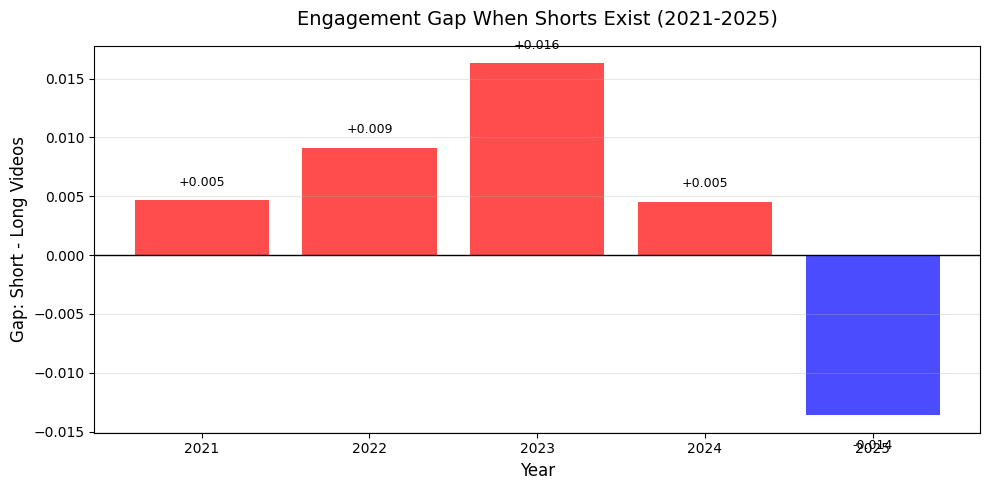

Before 2021: No Shorts

Only years with Shorts data:
2021: +0.005 → Shorts win
2022: +0.009 → Shorts win
2023: +0.016 → Shorts win
2024: +0.005 → Shorts win
2025: -0.014 → Long Videos win


In [ ]:
# First, calculate the engagement gap
df_clean['is_short'] = df_clean['duration_seconds'] <= 60

# Calculate average engagement by year and video type
engagement_by_year_type = df_clean.groupby(['year', 'is_short'])['engagement_rate'].mean().unstack()

# Rename columns for clarity
engagement_by_year_type.columns = ['Long Videos', 'Short Videos']

# Calculate the gap: Short - Long
gap = engagement_by_year_type['Short Videos'] - engagement_by_year_type['Long Videos']

# Now filter to years where Shorts exist
gap_clean = gap.dropna()

# Create the visualization
plt.figure(figsize=(10, 5))

# Create bars with conditional coloring
bars = plt.bar(gap_clean.index, gap_clean.values,
               color=['red' if x > 0 else 'blue' for x in gap_clean.values],
               alpha=0.7)

# Add value labels
for bar, g in zip(bars, gap_clean.values):
    label = f"+{g:.3f}" if g > 0 else f"{g:.3f}"
    y_position = bar.get_height() + (0.001 if g > 0 else -0.002)
    va_position = 'bottom' if g > 0 else 'top'

    plt.text(bar.get_x() + bar.get_width()/2, y_position,
             label, ha='center', va=va_position, fontsize=9)

plt.axhline(y=0, color='black', linewidth=1)
plt.title('Engagement Gap When Shorts Exist (2021-2025)', fontsize=14, pad=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Gap: Short - Long Videos', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"Before 2021: No Shorts")
print("\nOnly years with Shorts data:")
for y, g in gap_clean.items():
    winner = "Shorts win" if g > 0 else "Long Videos win"
    print(f"{y}: {g:+.3f} → {winner}")

<Figure size 800x500 with 0 Axes>

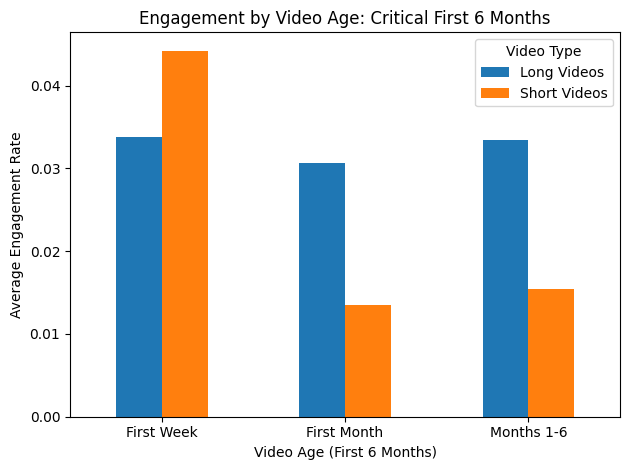

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

df_clean['age_simple'] = pd.cut(
    df_clean['video_age_days'],
    bins=[0, 7, 30, 180],
    labels=['First Week', 'First Month', 'Months 1-6']
)

simple_engagement = df_clean.groupby(
    ['age_simple', 'is_short'], observed=True
)['engagement_rate'].mean().unstack()

simple_engagement.columns = ['Long Videos', 'Short Videos']

plt.figure(figsize=(8, 5))
simple_engagement.plot(kind='bar')
plt.xlabel('Video Age (First 6 Months)')
plt.ylabel('Average Engagement Rate')
plt.title('Engagement by Video Age: Critical First 6 Months')
plt.legend(title='Video Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


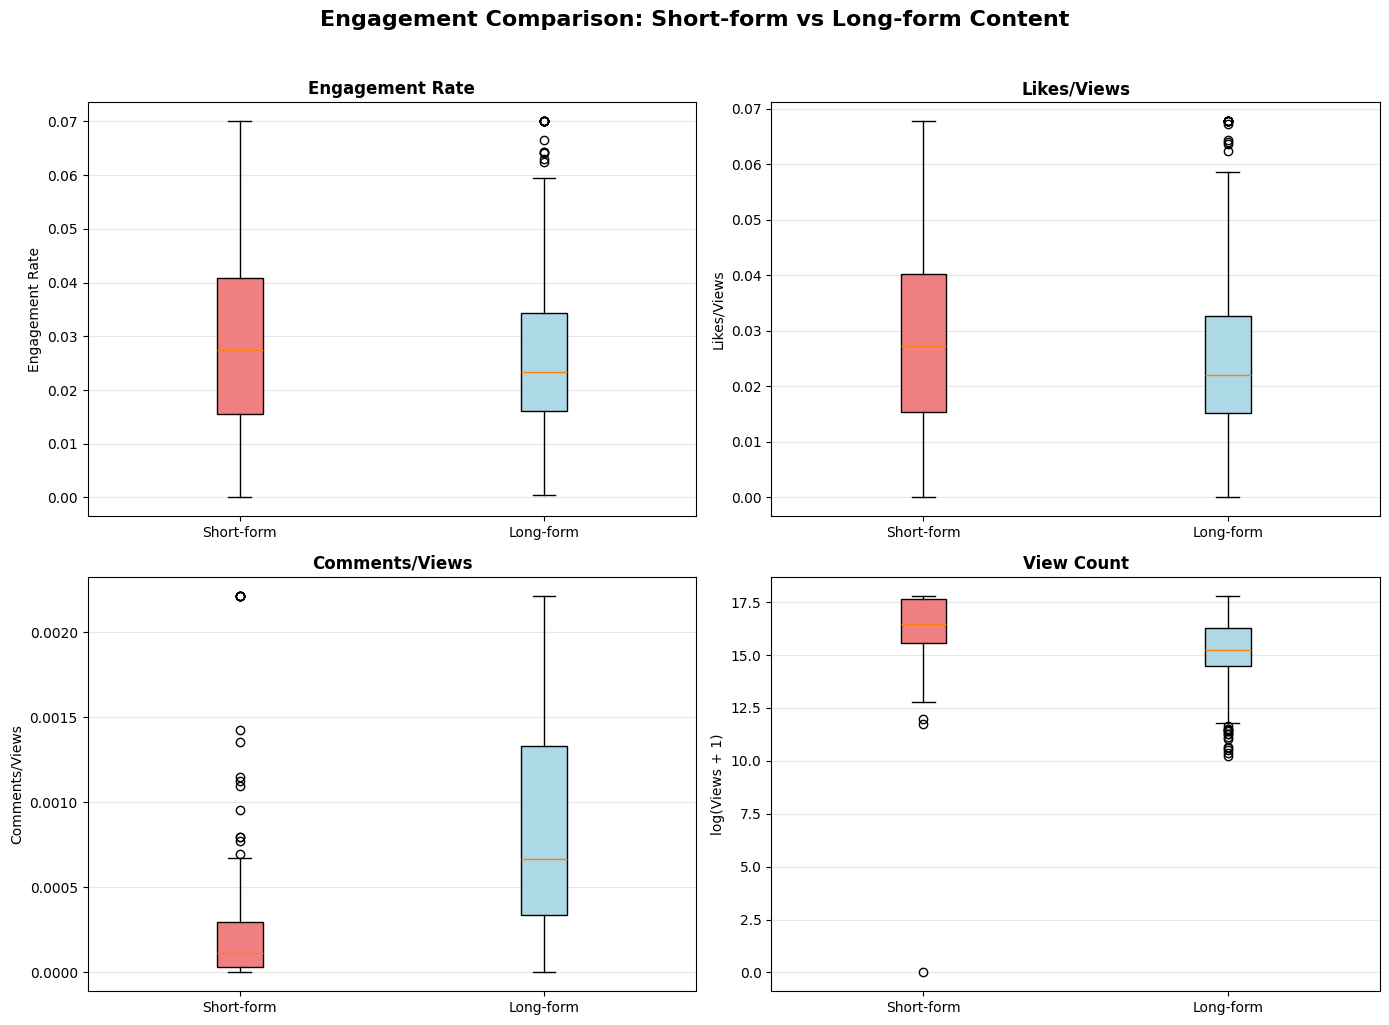

In [ ]:

# First create short_df and long_df
short_df = df_clean[df_clean['duration_seconds'] <= 60]
long_df = df_clean[df_clean['duration_seconds'] > 60]

# Metrics to compare
metrics = {
    'Engagement Rate': 'engagement_rate',
    'Likes/Views': 'likes_to_views_ratio',
    'Comments/Views': 'comments_to_views_ratio',
    'View Count': 'view_count'
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, (title, metric) in enumerate(metrics.items()):
    short_data = short_df[metric].dropna()
    long_data = long_df[metric].dropna()

    # Log transform for view counts
    if metric == 'view_count':
        short_data = np.log1p(short_data)
        long_data = np.log1p(long_data)
        ylabel = 'log(Views + 1)'
    else:
        ylabel = title

    # Boxplot
    bp = axes[idx].boxplot(
        [short_data, long_data],
        tick_labels=['Short-form', 'Long-form'],
        patch_artist=True
    )

    # Color coding
    colors = ['lightcoral', 'lightblue']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    axes[idx].set_title(f'{title}', fontweight='bold', fontsize=12)
    axes[idx].set_ylabel(ylabel)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.suptitle(
    'Engagement Comparison: Short-form vs Long-form Content',
    fontsize=16,
    fontweight='bold',
    y=1.02
)

plt.tight_layout()
plt.show()


# Conclusions and Discussion

YouTube has changed a lot over the past decade, and the dataset of 537 videos shows this very clearly. The first thing the data tells us is that engagement on YouTube is not equal at all. The average engagement rate is 2.87 percent, but this is pulled up by a small group of very successful videos. Most videos get normal engagement, while a few reach extremely high levels above 21 percent. So the engagement landscape is uneven from the start.

When we look at the videos in order by year, we can see three main phases. From 2012 to 2018, engagement was steady and low at around 1.57 percent. This was the traditional era before short videos became popular. Then from 2019 to 2020, YouTube started changing and experimenting with new formats, and engagement increased slightly to 2.03 percent. The biggest shift came from 2021 to 2025 when Shorts became global. Engagement rose to 3.09 percent, showing how much short-form content changed how people interact with videos.

Comparing short videos to long ones makes this even clearer. Short videos make up only about 38.4 percent of the dataset, but they reach far more people. Shorts average 35.6 million views, while long videos average 12.6 million. So even though there are fewer short videos, they travel much faster and reach a much bigger audience.

Shorts also lead in quick engagement like likes, while long videos get more comments. This means Shorts create fast reactions, but long videos encourage deeper interaction and thought. Long videos also deal with something called engagement dilution. When a long video becomes very viral, its engagement rate drops because it is harder to keep every viewer interacting in the same way.

We can also see that Shorts tend to win in the early days after they are posted, but long videos keep their engagement more steadily over months. In early 2025 there was even a moment when long videos took the lead again, which may mean people were starting to want longer content or the algorithm was shifting.

Overall, the dataset shows that short videos shape speed and reach on YouTube, while long videos shape depth and conversation. Both formats matter, and together they explain how YouTube works today.

Note: visualizations may be a bit different than the ones on our presentation slides (although sharing the same trends and insights, but with slightly diffrent number) because we modified the data cleaning part after the presentation day.

#Limitations:
Missing Viewer Demographics Data:
* Shorts might appeal specifically to younger audiences who have lower engagement propensity overall
* YouTube's algorithm and user base differ significantly by country

Possible Selection Bias in Dataset ( YouTube's recommendation):
* Our results generalize well to popular, recommended content, but may not apply to niche channels or emerging creators ( with less viewers or subscribers).





#Implications:

These findings suggest that creators and platforms should rethink what “engagement” really means. While Shorts attracted massive attention in earlier years, the 2025 decline shows that short-form content may not sustain meaningful interaction on its own. For creators, this means long-form videos remain important for building loyal communities, encouraging conversation, and keeping viewers engaged beyond quick swipes.

For YouTube, the shift raises questions about how the algorithm should balance reach versus depth. High view counts from Shorts do not always translate into discussion or long-term audience value. Future platform strategies might focus on integrating short and long-form content rather than prioritizing one format.

From a research perspective, these trends open the door to studying how viewer behavior evolves as platforms experiment with new recommendation systems. It also suggests examining whether the decline in Shorts engagement is temporary or part of a larger shift toward richer, more intentional content consumption.